In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Suicides-in-India-2001-2012.csv')
eduDf = df[df['Type_code']=='Education_Status']
causeDf = df[df['Type_code']=='Causes']
meansDf = df[df['Type_code']=='Means_adopted']
profDf = df[df['Type_code']=='Professional_Profile']
socialDf = df[df['Type_code']=='Social_Status']

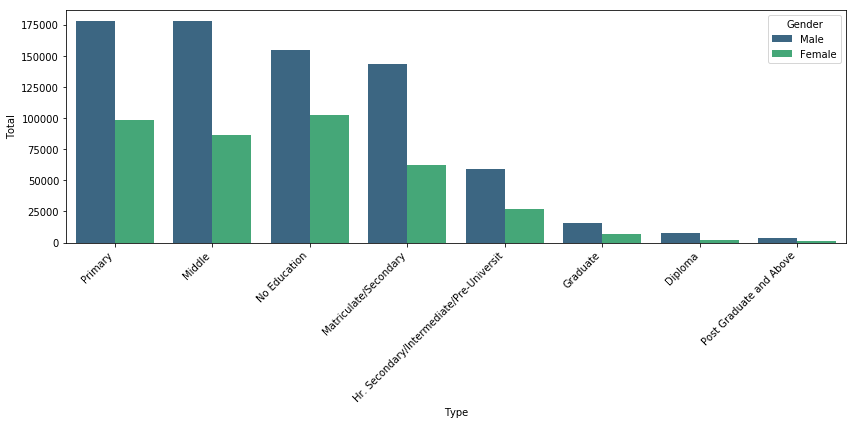

In [19]:
plt.figure(figsize = (12, 6))
eduDf = eduDf[['Type', 'Gender', 'Total']]
edSort = eduDf.groupby(['Type', 'Gender'],as_index = False).sum().sort_values('Total', ascending = False)
sns.barplot(x='Type', y='Total', hue='Gender', data=edSort,palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

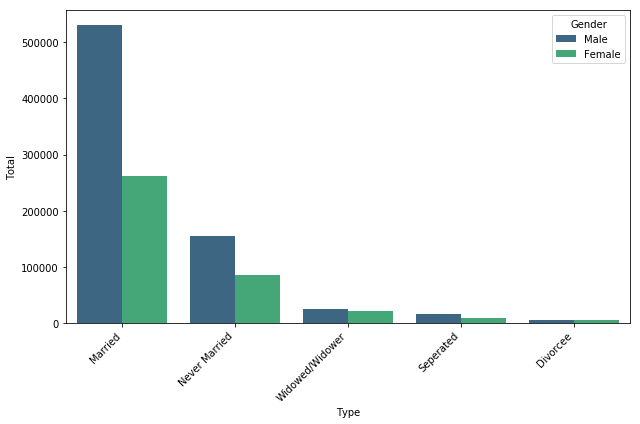

In [20]:
# Conclusion from above :Most of the people who have committed suicides have education level below 
# Matriculate/Secondary.
#Distribution on the basis of social status

plt.figure(figsize = (9, 6))
socialDf = socialDf[['Type', 'Gender', 'Total']]
socialSort = socialDf.groupby(['Type', 'Gender'],as_index = False).sum().sort_values('Total', ascending = False)
sns.barplot(x='Type', y='Total', hue='Gender', data=socialSort,palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()



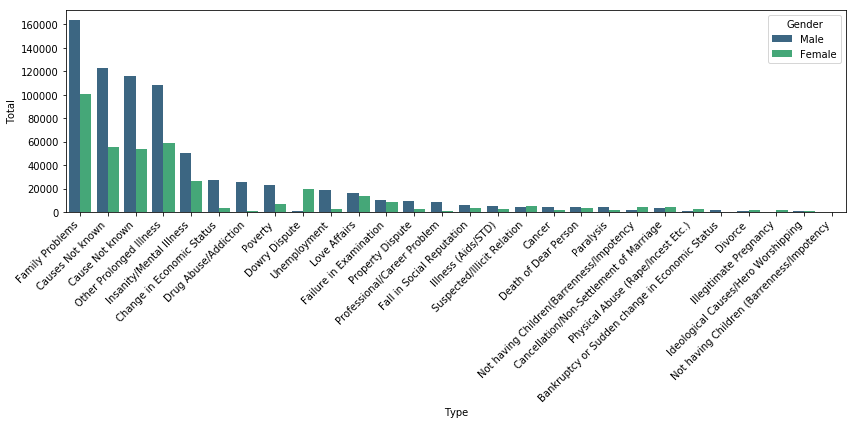

In [23]:
# Distribution on the basis of cause of suicide
causeDf.is_copy = False
causeDf.loc[causeDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causeDf.loc[causeDf['Type']=='Bankruptcy or Sudden change in Economic','Type'] = 'Change in Economic Status'
causeDf.loc[causeDf['Type']=='Other Causes (Please Specity)','Type'] = 'Cause Not known'
causeDf.loc[causeDf['Type']=='Not having Children (Barrenness/Impotency)','Type'] = 'Not having Children (Barrenness/Impotency)'
plt.figure(figsize = (12,6))
causeDf = causeDf[['Type','Gender','Total']]
causesSort = causeDf.groupby(['Type', 'Gender'],as_index = False).sum().sort_values('Total', ascending = False)
sns.barplot(x='Type', y='Total', hue='Gender', data=causesSort,palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()


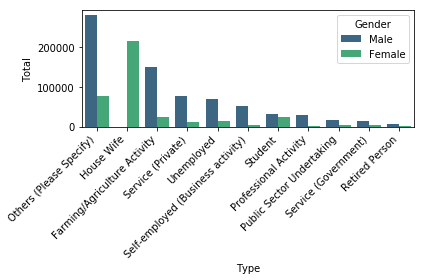

In [25]:
''' 
While most of the causes of the suicides are not known, the three major causes among the known cases are Family 
 problems, Prolonged illness and mental illness.
According to the data men seem to be badly effected by unemployment, property dispute, poverty,drug abuse or 
addiction and change in economic status than women.
Number of women who have committed suicides due to dowry disputes is much higher when compared to men,
plt.figure(figsize=(12,6))
'''



profDf = profDf[['Type', 'Gender', 'Total']]
profSort = profDf.groupby(['Type', 'Gender'],as_index = False).sum().sort_values('Total', ascending = False)
sns.barplot(x='Type', y='Total', hue='Gender', data=profSort,palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()




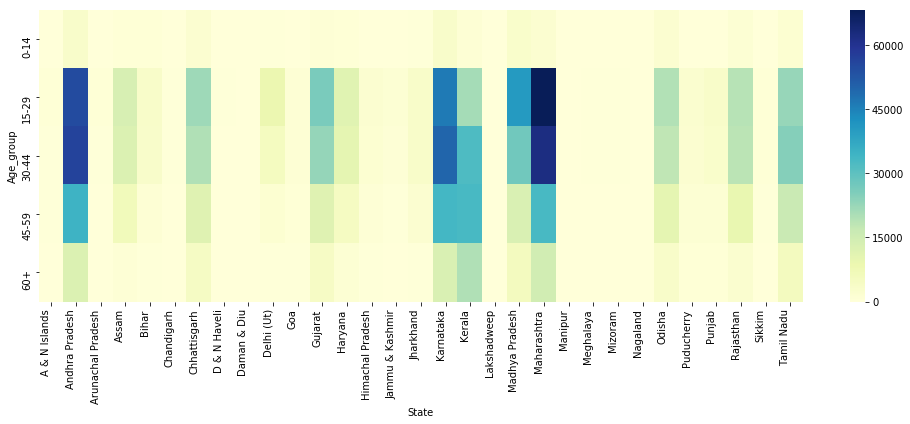

In [26]:
causes = df[df['Type_code'] == 'Causes']
causesGrp = causes.groupby(['State', 'Age_group'], as_index = False).sum()
causesGrpPvt = causesGrp.pivot(index = 'Age_group', columns = 'State', values = 'Total')
plt.figure(figsize = (14,6))
plt.xticks(rotation = 45, ha = 'right')
sns.heatmap(causesGrpPvt, cmap = 'YlGnBu')
plt.tight_layout()

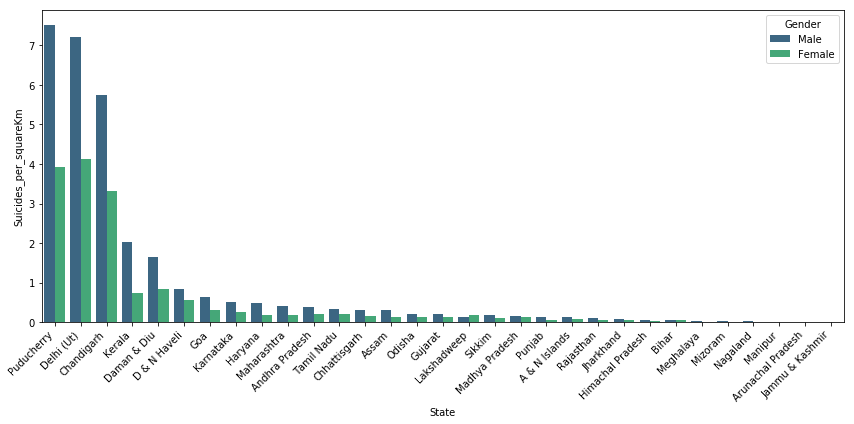

In [28]:
edu = df[df['Type_code']=='Education_Status']
plt.figure(figsize=(12,6))
st = edu.groupby(['State','Gender'],as_index=False).sum().sort_values('Total',ascending=False)
st = st[(st['State']!='Total (States)') & (st['State']!='Total (All India)') & (st['State']!='Total (Uts)')]
# values for areas are taken from wikipedia
statesArea = {'Maharashtra':307713,'West Bengal':88752,'Tamil Nadu':130058,'Andhra Pradesh':275045,'Karnataka':191791,'Kerala':38863,'Madhya Pradesh':308350,'Gujarat':196024,'Chhattisgarh':135191,'Odisha':155707,'Rajasthan':342239,'Uttar Pradesh':243290,'Assam':78438,'Haryana':44212,'Delhi (Ut)':1484,'Jharkhand':79714,'Punjab':50362,'Bihar':94163,'Tripura':10486,'Puducherry':562,'Himachal Pradesh':55673,'Uttarakhand':53483,'Goa':3702,'Jammu & Kashmir':222236,'Sikkim':7096,'A & N Islands':8249,'Arunachal Pradesh':83743,'Meghalaya':22429,'Chandigarh':114,'Mizoram':21081,'D & N Haveli':491,'Manipur':22327,'Nagaland':16579,'Daman & Diu':112,'Lakshadweep':32}
for state in statesArea.keys():
    st.loc[st['State']==state,'Area'] = statesArea[state]
st['Suicides_per_squareKm'] = st['Total']/st['Area']
sortedStates = st.sort_values('Suicides_per_squareKm',ascending = False)
sns.barplot(x='State', y='Suicides_per_squareKm', hue='Gender', data=sortedStates,palette='viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()